In [1]:
from tqdm.auto import tqdm
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from sklearn import metrics

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianalexander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/julianalexander/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#from google.colab import drive

# Mounting Drive inside the Colab notebook
#drive.mount('/content/drive')

In [3]:
df1 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Julian_TOTAL-klassifiziert.csv")
df2 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Marek_klassifiziert.csv")
df3 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Yonas_Total_Klassifiziert.csv")

In [4]:
#df1 = pd.read_csv("/Users/yonas/Desktop/GitHub/Text-Mining/TextMining21/Reddit_Julian_TOTAL-klassifiziert.csv")
#df2 = pd.read_csv("/Users/yonas/Desktop/GitHub/Text-Mining/TextMining21/Reddit_Marek_klassifiziert.csv")
#df3 = pd.read_csv("/Users/yonas/Desktop/GitHub/Text-Mining/TextMining21/Reddit_Yonas_Total_Klassifiziert.csv")

In [5]:
Atweets = pd.concat([df1, df2, df3], axis=0, join='inner')
Atweets = Atweets.sort_values(by='index')
Atweets = Atweets.reset_index(drop=True)

# **Preprocessing**

Punktuierung

In [6]:
def remove_punctuation(txt):
    txt_nopunt = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunt

In [7]:
Atweets["submission"] = Atweets["submission"].apply(lambda x: remove_punctuation(x))

Tokenisierung

In [8]:
def tokenize(txt):
    tokens = re.split("\W+", txt)
    return tokens

In [9]:
Atweets["submissions_tokenized"] = Atweets["submission"].apply(lambda x: tokenize(x.lower()))

Stopwörter

In [10]:
stopwords = nltk.corpus.stopwords.words("english")

In [11]:
stopwords.append("ll")
stopwords.append("im")
stopwords.append("youre")
stopwords.append("youve")
stopwords.append("youll")
stopwords.append("youd")
stopwords.append("shes")
stopwords.append("its")
stopwords.append("thatll")
stopwords.append("dont")
stopwords.append("shouldve")
stopwords.append("arent")
stopwords.append("couldnt")
stopwords.append("didnt")
stopwords.append("doesnt")
stopwords.append("hadnt")
stopwords.append("havent")
stopwords.append("isnt")
stopwords.append("mightnt")
stopwords.append("neednt")
stopwords.append("shant")
stopwords.append("shouldnt")
stopwords.append("wasnt")
stopwords.append("werent")
stopwords.append("wont")
stopwords.append("wouldnt")

In [12]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [13]:
Atweets["submission_no_stopwords"] = Atweets["submissions_tokenized"].apply(lambda x: remove_stopwords(x))

Stemming

In [14]:
ps = PorterStemmer()

In [15]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [16]:
Atweets["submission_stemmed"] = Atweets["submission_no_stopwords"].apply(lambda x: stemming(x))

Lemmatisierung

In [17]:
wn = nltk.WordNetLemmatizer()

In [18]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [19]:
Atweets["submission_lemmatized"] = Atweets["submission_no_stopwords"].apply(lambda x: lemmatization(x))

# Classifier & Feature Extraction

## A. Train & Test-Set

In [20]:
Atweets["submission_cleaned"] = " "

for i in range(0, len(Atweets) - 1):
  Atweets.loc[i,"submission_cleaned"] = " ".join(Atweets.loc[i,"submission_stemmed"])

In [21]:
Corpus = Atweets.loc[:, "submission_cleaned"].values

In [22]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus,Atweets['sentiment'],test_size=0.2)

In [23]:
Train_Y_1 = Train_Y
Test_Y_1 = Test_Y

Train_Y_2 = Train_Y
Test_Y_2 = Test_Y

Train_Y_1 = np.where(Train_Y_1 == 1.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 2.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 3.0, 1, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 4.0, 0, Train_Y_1)
Train_Y_1 = np.where(Train_Y_1 == 5.0, 0, Train_Y_1)

Train_Y_2 = np.where(Train_Y_2 == 1.0, 1, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 2.0, 1, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 3.0, 2, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 4.0, 3, Train_Y_2)
Train_Y_2 = np.where(Train_Y_2 == 5.0, 3, Train_Y_2)


Test_Y_1 = np.where(Test_Y_1 == 1.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 2.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 3.0, 1, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 4.0, 0, Test_Y_1)
Test_Y_1 = np.where(Test_Y_1 == 5.0, 0, Test_Y_1)

Test_Y_2 = np.where(Test_Y_2 == 1.0, 1, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 2.0, 1, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 3.0, 2, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 4.0, 3, Test_Y_2)
Test_Y_2 = np.where(Test_Y_2 == 5.0, 3, Test_Y_2)

## B. Feature Extraction: TF-IDF-Vectorizer

In [24]:
Tfidf_vect = TfidfVectorizer(max_features=12842)
Tfidf_vect.fit(Corpus)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## B.1. Naive Bayes Classifier (MultinomialNB)

In [25]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y_2)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_2)*100)

Naive Bayes Accuracy Score ->  76.37271214642263


**Precision, Recall & F-score**

In [26]:
# precision_recall_fscore_support(predictions_NB, Test_Y_2, average='weighted')

In [27]:
mnb_scores = precision_recall_fscore_support(Test_Y_2, predictions_NB, average='weighted')
print(f'Naives Bayes Precision Score: {mnb_scores[0]*100:.2f}%')
print(f'Naives Bayes Recall Score: {mnb_scores[1]*100:.2f}%')
print(f'Naives Bayes F-Score Score: {mnb_scores[2]*100:.2f}%')

Naives Bayes Precision Score: 58.33%
Naives Bayes Recall Score: 76.37%
Naives Bayes F-Score Score: 66.14%


/Users/julianalexander/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes Predictions - Confusion Matrix**

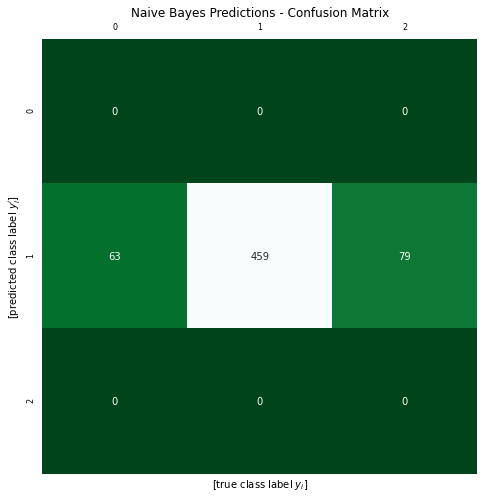

In [28]:
from sklearn.metrics import confusion_matrix
# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_NB)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('Naive Bayes Predictions - Confusion Matrix');

## B.2. Support Vector Machines Classifier (SVM)

In [29]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y_2)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_2)*100)
SVM_accuracy = accuracy_score(predictions_SVM, Test_Y_2)*100
print(f'SVM Accuracy Score: {SVM_accuracy:.2f}%')

SVM Accuracy Score: 76.87%


**Precision, Recall & F-score**

In [30]:
# precision_recall_fscore_support(predictions_SVM, Test_Y_2, average='weighted')

In [31]:
svm_scores = precision_recall_fscore_support(Test_Y_2, predictions_SVM, average='weighted')
print(f'SVM Precision Score: {svm_scores[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores[2]*100:.2f}%')

SVM Precision Score: 75.19%
SVM Recall Score: 76.87%
SVM F-Score Score: 68.30%


**SVM Predictions - Confusion Matrix**

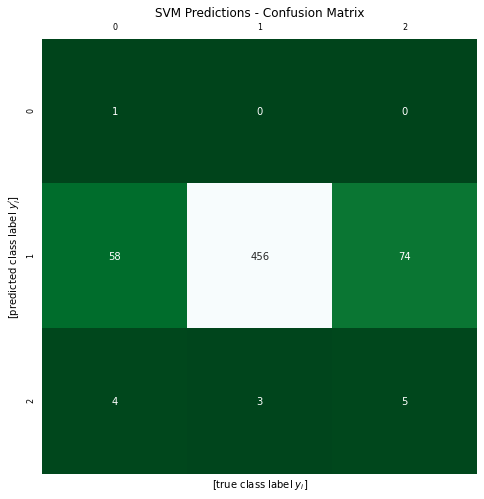

In [32]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library

import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

## C. Feature Extraction: CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
vectorizer = CountVectorizer(min_df = 0.05, stop_words='english', ngram_range = (1,1))
X = vectorizer.fit_transform(Corpus)

X = X.toarray()

## C.1. Support Vector Machines Classifier (SVM)

In [34]:
from sklearn.svm import SVC
from sklearn import metrics

# Creating an obect containing parametrisation setup for SVM 
svm = SVC(kernel='poly', degree = 2, C=100, random_state=1234)

vectorizer.fit(Corpus)
Train_X_count = vectorizer.transform(Train_X)
Test_X_count = vectorizer.transform(Test_X)

# Training an SVM model with parameters set in the previous  step
svm.fit(Train_X_count, Train_Y_2)

# Calculating model predictions on evaluation data
y_pred = svm.predict(Test_X_count)

# Accuracy on evaluation data
eval_accuracy = metrics.accuracy_score(Test_Y_2, y_pred) * 100
print(f'Model classification accuracy: {eval_accuracy:.2f}%')

Model classification accuracy: 65.22%


**Precision, Recall & F-score**

In [35]:
# precision_recall_fscore_support(Test_Y_2, y_pred, average='weighted')

In [36]:
svm_scores_2 = precision_recall_fscore_support(Test_Y_2, y_pred, average='weighted')
print(f'SVM Precision Score: {svm_scores_2[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores_2[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores_2[2]*100:.2f}%')

SVM Precision Score: 62.84%
SVM Recall Score: 65.22%
SVM F-Score Score: 63.90%


**SVM Predictions - Confusion Matrix**

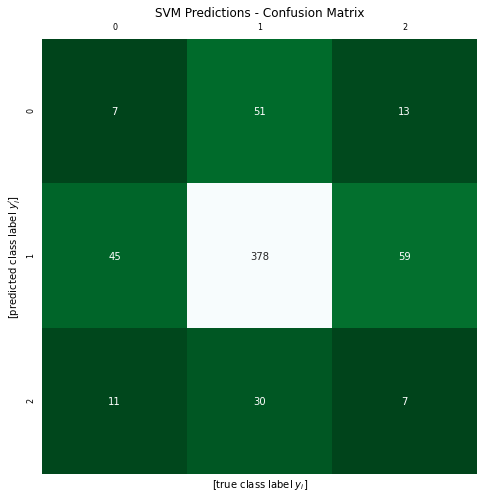

In [37]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, y_pred)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

# D. Hierarchical Classification (1. Naive Bayes, 2. SVM)

## D.1. First-Classification in Neutral/Non-Neutral with Naive Bayes (MultinomialNB)

In [38]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y_1)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_1)*100)

Naive Bayes Accuracy Score ->  76.37271214642263


**Precision, Recall & F-score**

In [ ]:
# precision_recall_fscore_support(predictions_NB, Test_Y_1, average='weighted')

In [39]:
mnb_scores_2 = precision_recall_fscore_support(Test_Y_1, predictions_NB, average='weighted')
print(f'Naives Bayes Precision Score: {mnb_scores_2[0]*100:.2f}%')
print(f'Naives Bayes Recall Score: {mnb_scores_2[1]*100:.2f}%')
print(f'Naives Bayes F-Score Score: {mnb_scores_2[2]*100:.2f}%')

Naives Bayes Precision Score: 58.33%
Naives Bayes Recall Score: 76.37%
Naives Bayes F-Score Score: 66.14%


/Users/julianalexander/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes Predictions - Confusion Matrix**

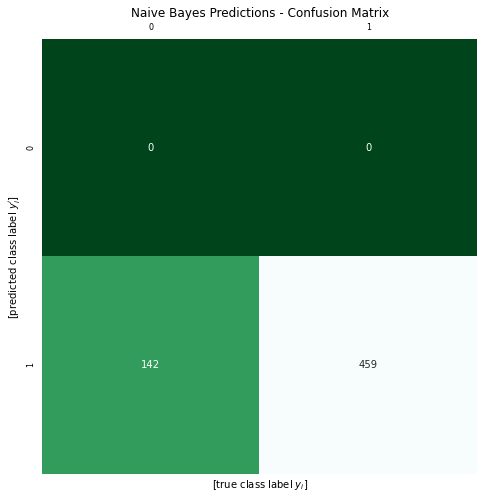

In [40]:
from sklearn.metrics import confusion_matrix
# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_1, predictions_NB)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('Naive Bayes Predictions - Confusion Matrix');

## D.2. Hierarchical Classification 1: Neutral/Non-Neutral with Support Vector Machines (SVM)

In [41]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_hierarchical_1 = SVC(C=100, kernel='linear', degree=3, gamma='auto')
SVM_hierarchical_1.fit(Train_X_Tfidf,Train_Y_1)
# predict the labels on validation dataset
predictions_SVM = SVM_hierarchical_1.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_1)*100)

SVM Accuracy Score ->  74.04326123128119


**Precision, Recall & F-score**

In [42]:
# precision_recall_fscore_support(predictions_SVM, Test_Y_1, average='weighted')

In [43]:
svm_scores_3 = precision_recall_fscore_support(Test_Y_1, predictions_SVM, average='weighted')
print(f'SVM Precision Score: {svm_scores_3[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores_3[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores_3[2]*100:.2f}%')

SVM Precision Score: 73.05%
SVM Recall Score: 74.04%
SVM F-Score Score: 73.49%


**SVM Predictions - Confusion Matrix**

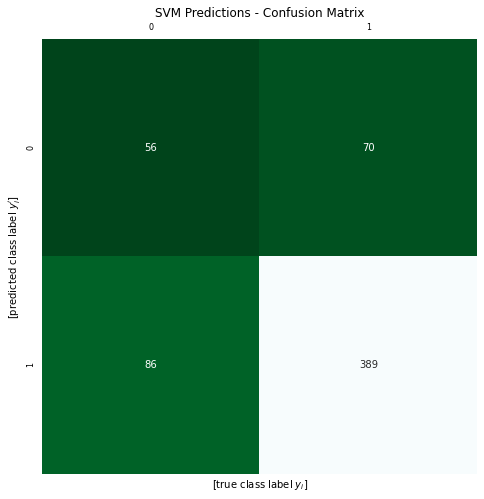

In [44]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library

import matplotlib.pyplot as plt
import seaborn as sns

# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_1, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

## D.3. Hierarchical Classification 2: Positive/Negative with Support Vector Machines (SVM)

In [45]:
indices_train = Train_Y_2 != 2
indices_test = Test_Y_2 != 2

In [46]:
Train_Y_2 = Train_Y_2[indices_train]
Train_X = Train_X[indices_train]

Test_Y_2 = Test_Y_2[indices_test]
Test_X = Test_X[indices_test]

In [47]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_hierarchical_2 = SVC(C=1000, kernel='poly', degree=3, gamma='auto')

Train_X_count = vectorizer.transform(Train_X)
Test_X_count = vectorizer.transform(Test_X)

SVM_hierarchical_2.fit(Train_X_count,Train_Y_2)
# predict the labels on validation dataset
predictions_SVM = SVM_hierarchical_2.predict(Test_X_count)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_2)*100)

SVM Accuracy Score ->  50.70422535211267


**Precision, Recall & F-score**

In [48]:
# precision_recall_fscore_support(predictions_SVM, Test_Y_2, average='weighted')

In [49]:
svm_scores_4 = precision_recall_fscore_support(Test_Y_2, predictions_SVM, average='weighted')
print(f'SVM Precision Score: {svm_scores_4[0]*100:.2f}%')
print(f'SVM Recall Score: {svm_scores_4[1]*100:.2f}%')
print(f'SVM F-Score Score: {svm_scores_4[2]*100:.2f}%')

SVM Precision Score: 43.86%
SVM Recall Score: 50.70%
SVM F-Score Score: 42.85%


**SVM Predictions - Confusion Matrix**

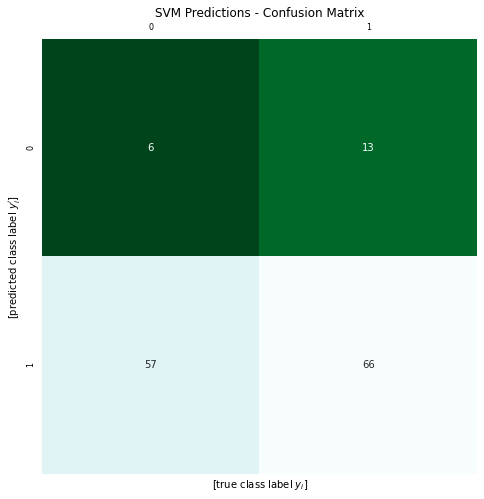

In [50]:
# determine the prediction confusion matrix
mat = confusion_matrix(Test_Y_2, predictions_SVM)

# init the plot
plt.figure(figsize=(8, 8))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)

# add plot title
plt.title('SVM Predictions - Confusion Matrix');